# Lending Club Loan Payback Classification - Exploratory Analysis

This data set represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals.  Of course, not all loans are created equal. Someone who is a essentially a sure bet to pay back a loan will have an easier time getting a loan with a low interest rate than someone who appears to be riskier. 

And for people who are very risky? They may not even get a loan offer, or they may not have accepted the loan offer due to a high interest rate. 
It is important to keep that last part in mind, since this data set only represents loans actually made, i.e. do not mistake this data for loan applications.

In this demo - we will analyze the dataset and preprocess it based on our requirements defined by our 'business understanding'

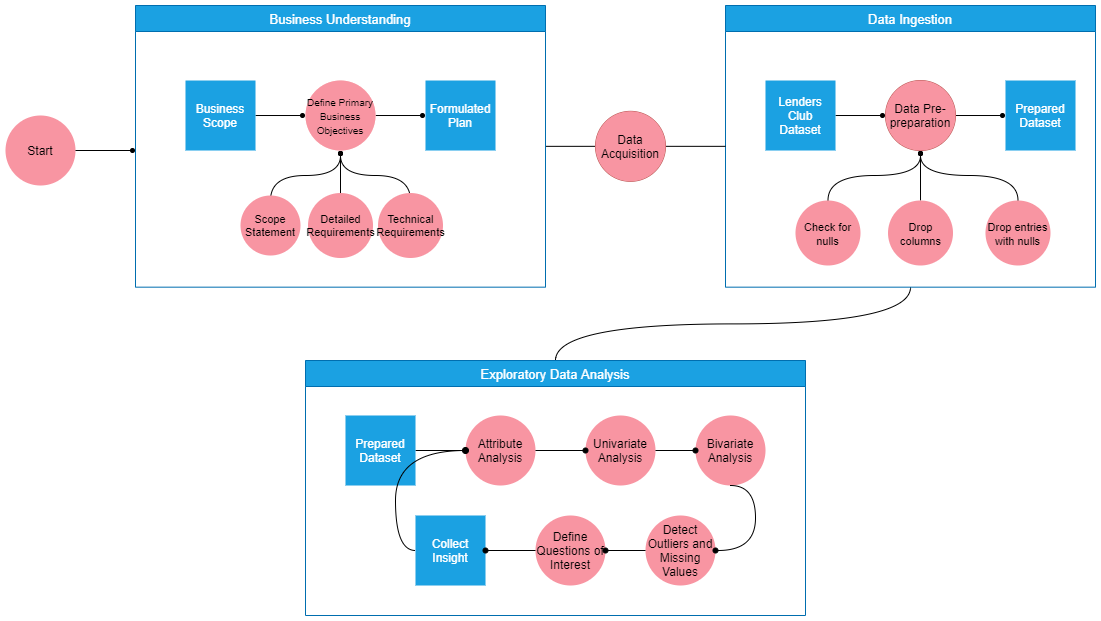

### Business Understanding
Initially we have to gain business understanding. For this use case, we define a scope statement - overall, we would like to build a classifier to ascertain  whether a customer(who is requesting a loan) will be able to repay the loan along with the interest amount. 
We define the detailed and technical requirements of the scope statement, specifically the type of data we will require and the specific methods we will actually apply.

This usually forms part of the Business Analysis part of the problem - so we'll hold back on showing this part of the job!

During this demo, we show the initial stages of the process which includes the data acquisition, the typical ingestion and preprocessing phase and the exploratory data analysis phase.

### Data Acquisition 

In a business environment, your data will exist in multiple various locations, these could include databases, data lakes, data warehouses, excel spreadsheets, and sometimes if you're lucky - in scanned PDF form. 

The data acquisition phase along with preprocessing - as mentioned earlier - usually takes up the bulk of the time because it may exist in different forms, be recieved at different rates, or in large volumes. 
Moreover, we may have some dirty data that needs to be cleaned.

Lucky in this case, we've made use of a simple publicly available CSV file - loan data from a Lending Club - the data is relatively clean (but we had to still tidy it up a bit more).

In [1]:
# Loading important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Snapshot of the dirty data

In [2]:
# Loading the raw loan stats dataset
df = pd.read_csv('LoanStats3a.csv', low_memory=False)

In [3]:
# Looking at the top 5 rows to understand data
pd.set_option('display.max_columns', None)

df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,NaN,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.

In [ ]:
# Size of the dataset
df.shape

This dataset contains 42538 rows and 144 columns. Out of these 144 columns, many columns have null values in majority.

### Data Preprocessing

These steps include:
- Our checks for nulls (and drop those columns)
- High cardinality checks (and drop columns)
- Removal of null rows.
- Outlier detection.

##### How many null values do we actually have?

In [6]:
df.isnull().sum().sort_values(ascending=False)

inq_fi                      42538
num_tl_op_past_12m          42538
mort_acc                    42538
mths_since_recent_bc        42538
mths_since_recent_bc_dlq    42538
                            ...  
dti                             3
addr_state                      3
zip_code                        3
purpose                         3
hardship_flag                   3
Length: 144, dtype: int64

In [7]:
# Total percentage of null values in the data
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.6313577141483955

In fact, 63.15% of the values in the overall data are null values. So, it is very important to carefully deal with these null values as they can significantly affect our results.

Most of the columns are float but there are some categorical columns stored as objects. We will look into this issue in the subsequent steps after deciding upon the final columns to consider in the final dataframe .

The next diagram is a heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions

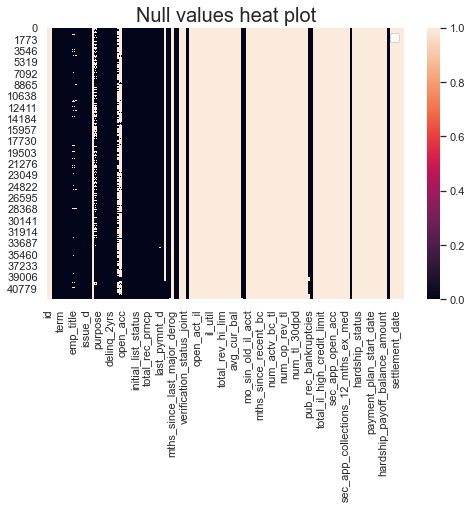

In [8]:
# Checking for null values using a heat map as a visualizing tool
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(df.isnull())
plt.title('Null values heat plot',fontdict={'fontsize': 20})
plt.legend(df.isnull())
plt.show()

### Handling Null Values

Handling null values is an important task here. From the heatmap above, we can see that a large amount of the dataset are actually null values. In the below code, you can see that there are only 53 columns out of 144 columns that have null values less than 40 percent.

In [9]:
# Creating a dataframe to display percentage of null values in each column
a = pd.DataFrame()
a['Percentage of null values']=['10% or less','20% or less','30% or less','40% or less','50% or less','60% or less','70% or less']

ten_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.1])
twenty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.2])
thirty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.3])
fourty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.4])
fifty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.5])
sixty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.6])
seventy_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.7])


a['No.of columns'] = [ten_percent,twenty_percent,thirty_percent,fourty_percent,fifty_percent,sixty_percent,seventy_percent]
a

,Percentage of null values,No.of columns
0,10% or less,52
1,20% or less,52
2,30% or less,52
3,40% or less,53
4,50% or less,53
5,60% or less,53
6,70% or less,54


In [10]:
# Considering only those columns which have null values less than 40% in that particular column
df = pd.read_csv('LoanStats3a.csv')
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.4]]
df.shape

C:\Users\luqmaan.hassim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(42538, 53)

By considering columns with less number of null values, we were able to decrease total number of columns from 144 to 53.

### Shapshot post null treatment

In [11]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,May-19,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.00,Jun-14,649.91,Jun-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


In [12]:
# Checking info of updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   funded_amnt                 42535 non-null  float64
 2   funded_amnt_inv             42535 non-null  float64
 3   term                        42535 non-null  object 
 4   int_rate                    42535 non-null  object 
 5   installment                 42535 non-null  float64
 6   grade                       42535 non-null  object 
 7   sub_grade                   42535 non-null  object 
 8   emp_title                   39909 non-null  object 
 9   emp_length                  41423 non-null  object 
 10  home_ownership              42535 non-null  object 
 11  annual_inc                  42531 non-null  float64
 12  verification_status         42535 non-null  object 
 13  issue_d                     425

There are still some columns like emp_title and desc which have lot of null values. In the following steps, we will look into other columns as well to check for their importance and then decide on whether to include them in the final dataframe. 

## Understanding Features

It is important to understand the features/columns as some of the categorical columns present in the data are in the form of numerical values and vice-versa. We first tried to examine every column but later understood that it will be quite cumbersome to perform these operations to all 53 columns. So, we decided to first eliminate columns which doesn’t add value to the data and then analyze each field.

In [16]:
df.emp_title.value_counts()

US Army                             139
Bank of America                     115
IBM                                  72
Kaiser Permanente                    61
AT&T                                 61
                                   ... 
Club One                              1
Equifax                               1
Liberty Mutual - Agency Markets       1
Cypress Fairbanks ISD                 1
Johns Hopkins                         1
Name: emp_title, Length: 30658, dtype: int64

'emp_title' feature has many unique values in it and it doesn't add any information for our questions. It's better to drop this column due to the high cardinality.

### Instead of checking every column of 53 columns like above, here we are running a for loop on top of 'object' columns and take a decison based on the output of this cell.


In [17]:
# Checking columns that are of dtype 'object'
df.columns[df.dtypes == 'object']

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [18]:
# Instead of checking every column of 53 columns like above, here we are running a for loop on top of 'object' columns and take a decison based on the output of this cell.
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts())
    print('************************')

 36 months    31534
 60 months    11001
Name: term, dtype: int64
************************
10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.41%      1
21.48%      1
16.20%      1
24.59%      1
17.72%      1
Name: int_rate, Length: 394, dtype: int64
************************
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
************************
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
************************
US Army                             139
Bank of America                     115
IBM                                  72
K

Name: desc, Length: 28963, dtype: int64
************************
debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64
************************
Debt Consolidation                 2259
Debt Consolidation Loan            1760
Personal Loan                       708
Consolidation                       547
debt consolidation                  532
                                   ... 
chest surgery                         1
Appliances for Newly Built Home       1
Lower interest                        1
big 6                                 1
FinallyWise                           1
Name: title, Length: 21256, dtype: int64
*********

In [19]:
df[df.columns[df.dtypes == 'object']].nunique()

term                        2
int_rate                  394
grade                       7
sub_grade                  35
emp_title               30658
emp_length                 11
home_ownership              5
verification_status         3
issue_d                    55
loan_status                 4
pymnt_plan                  1
desc                    28963
purpose                    14
title                   21256
zip_code                  837
addr_state                 50
earliest_cr_line          530
revol_util               1119
initial_list_status         1
last_pymnt_d              112
last_credit_pull_d        143
application_type            1
hardship_flag               1
debt_settlement_flag        2
dtype: int64

#### Feature processing considerations

- High-cardinality refers to columns with values that are very uncommon or unique. High-cardinality column values are typically identification numbers, email addresses, or user names. An example of a data table column with high-cardinality would be a USERS table with a column named USER_ID
- Constant features are the type of features that contain only one value for all the outputs in the dataset. Constant features provide no information that can help in classification of the record at hand. Therefore, it is advisable to remove all the constant features from the dataset. They can also occur where as "Quasi Constant" where one value holds the majority of the records. (extremely imbalanced)

#### Reasoning for dropping some columns 

- emp_title - high cardinality in employee title.
- payment_plan - is a constant value.
- desc - High cardinality. Requires some form of text analytics (out of scope/homework).
- title - High cardinality. Requires some form of text analytics.
- zip_code - Requires geospatial analytics.
- addr_state - Requires geospatial analytics.
- initial_list_status - is a constant value.
- application_type - is a constant value.
- hardship_flag - is a constant value.
- debt_settlement_flag - extremely imbalanced: N - 42375 and Y- 160

In [20]:
# After observing the above output, we are dropping columns which are not important and which doesn't add value to our use case.

df.drop(['emp_title','pymnt_plan','desc','title', 'zip_code', 'addr_state', 'initial_list_status','application_type','hardship_flag','debt_settlement_flag'],axis=1,inplace=True)

In [21]:
# Similarly, checking some numerical columns
col = ['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens']
for i in col:
    print(df[i].value_counts())
    print('************************')

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64
************************
0.0    42390
Name: chargeoff_within_12_mths, dtype: int64
************************
0.0    42390
Name: collections_12_mths_ex_med, dtype: int64
************************
0.0       42504
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64
************************
1.0    42535
Name: policy_code, dtype: int64
************************
0.0    42429
1.0        1
Name: tax_liens, dtype: int64
************************


Since these numerical columns contain merely constant values, we resort to dropping them.

In [22]:
# There are also few not so useful numerical columns.We are dropping these numerical columns after examining them. 

df.drop(['acc_now_delinq','chargeoff_within_12_mths','collection_recovery_fee',
         'collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens'],axis=1,inplace=True)

After dropping these columns, we double-check the heatmap of null values.

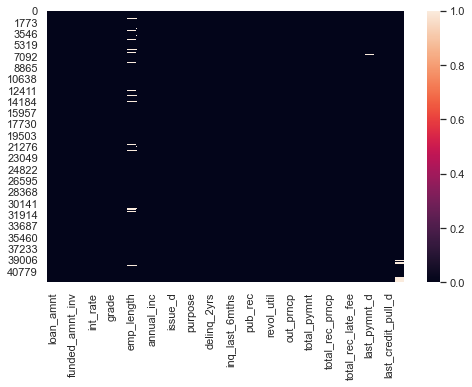

In [23]:
# Checking for null values in the updated dataframe
sns.heatmap(df.isnull())
plt.show()

In [24]:
df.isnull().sum()

loan_amnt                  3
funded_amnt                3
funded_amnt_inv            3
term                       3
int_rate                   3
installment                3
grade                      3
sub_grade                  3
emp_length              1115
home_ownership             3
annual_inc                 7
verification_status        3
issue_d                    3
loan_status                3
purpose                    3
dti                        3
delinq_2yrs               32
earliest_cr_line          32
inq_last_6mths            32
open_acc                  32
pub_rec                   32
revol_bal                  3
revol_util                93
total_acc                 32
out_prncp                  3
out_prncp_inv              3
total_pymnt                3
total_pymnt_inv            3
total_rec_prncp            3
total_rec_int              3
total_rec_late_fee         3
recoveries                 3
last_pymnt_d              86
last_pymnt_amnt            3
last_credit_pu

In [25]:
df.shape
# We were able to decrease no.of columns from 53 to 35 and we will still try to decrease the no.of columns.

(42538, 36)

In [26]:
# Checking two columns which are the same. 
df[df['out_prncp'] != df['out_prncp_inv']] # Both are same

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Checking for null values
# Percentage of null values
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
pub_rec_bankruptcies,3.215948
emp_length,2.621186
revol_util,0.218628
last_pymnt_d,0.202172
delinq_2yrs,0.075227
earliest_cr_line,0.075227
inq_last_6mths,0.075227
open_acc,0.075227
pub_rec,0.075227
total_acc,0.075227


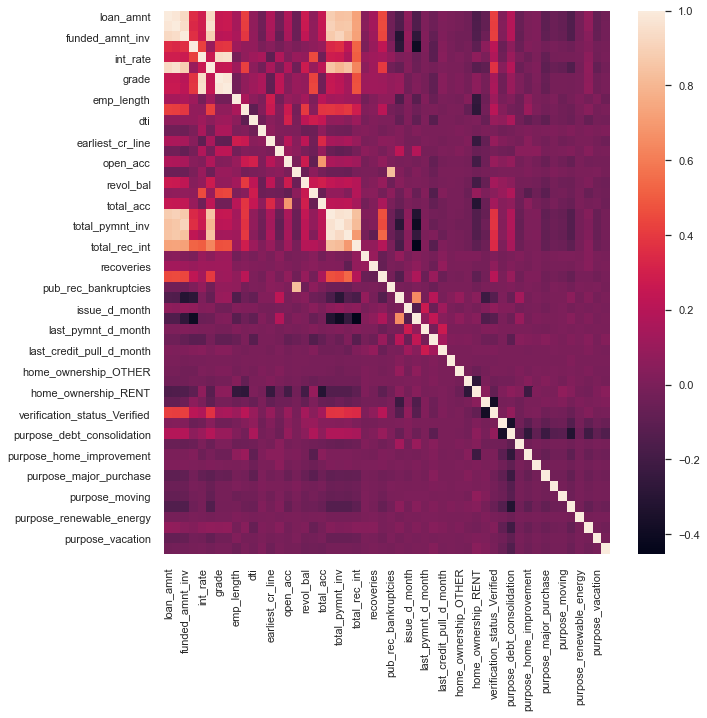

In [83]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr(),annot=False)
plt.show()

In [29]:
# Dropping those columns to avoid multi-collinearity
df.drop('out_prncp_inv',axis=1,inplace = True)
df.drop('out_prncp',axis=1,inplace = True)

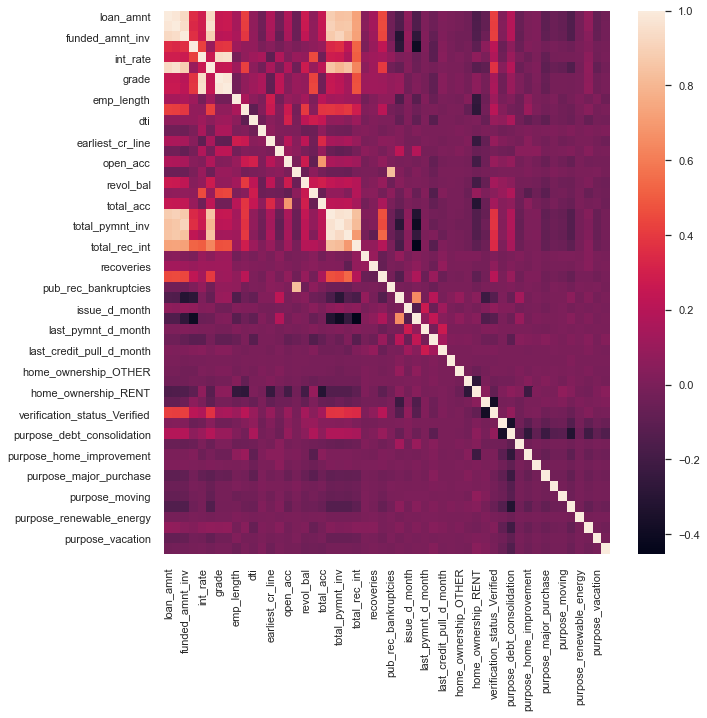

In [84]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr(),annot=False)
plt.show()

We can see some columns having high correlation but we aren't dropping these columns as yet. These columns might not be even considered while solving our particular question. We will investigate the implications of these columns later - bear in mind that we should not merely drop all attributes that display multicollinearity and in some cases we may actually make use of them as input variables.

In [31]:
# Now that we have come to a conclusion on which columns to consider in the final data frame, we can drop rows which have only null values.
df.dropna(how='all',inplace=True) 
# Dropping rows which have only null values in all the columns

In [32]:
# Checking the final shape of the dataframe
df.shape

(42535, 34)

In [33]:
# Checking if still there are any null values
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1112
home_ownership             0
annual_inc                 4
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs               29
earliest_cr_line          29
inq_last_6mths            29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util                90
total_acc                 29
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_d              83
last_pymnt_amnt            0
last_credit_pull_d         4
pub_rec_bankruptcies    1365
dtype: int64

##### There are still few null values which we will deal in the end after pre-processing few more numerical columns.

## Converting categorical columns to date columns

The columns [‘issue_d’,’last_pymnt_d’,’last_credit_pull_d’] which are datetime columns are further divided into month and year by using pandas datetime module. The new columns are named as ‘issue_d_year’, ‘issue_d_month’, ‘last_pymnt_d_year’, ‘last_pymnt_d_month’, ‘last_credit_pull_d_year’, ‘last_credit_pull_d_month’ respectively.

In [34]:
# The next step is to convert categorical columns and date-time columns to numerical columns
# Checking 5 point summary
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies
count,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,41170.000000
mean,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,1.081424,9.343951,0.058156,1.429786e+04,22.124406,12020.414206,11312.953251,9675.675936,2239.981444,1.516890,103.240029,2613.245652,0.045227
std,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,1.527455,4.496274,0.245713,2.201844e+04,11.592811,9094.890303,9038.639113,7105.750304,2585.057393,7.830064,737.171320,4385.066535,0.208737
min,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,5465.685189,4793.115000,4400.000000,657.100000,0.000000,0.000000,211.050000,0.000000
50%,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8.821000e+03,20.000000,9682.251696,8956.080000,8000.000000,1339.160000,0.000000,0.000000,528.360000,0.000000
75%,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,12.000000,0.000000,1.725100e+04,29.000000,16427.850065,15544.335000,13499.995000,2803.090000,0.000000,0.000000,3170.220000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,47.000000,5.000000,1.207359e+06,90.000000,58886.473430,58563.680000,35000.020000,23886.470000,209.000000,29623.350000,36115.200000,2.000000


## Converting date columns to numerical columns

The columns [‘issue_d’,’last_pymnt_d’,’last_credit_pull_d’] which are datetime columns are further divided into month and year by using pandas datetime module. The new columns are named as ‘issue_d_year’, ‘issue_d_month’, ‘last_pymnt_d_year’, ‘last_pymnt_d_month’, ‘last_credit_pull_d_year’, ‘last_credit_pull_d_month’ respectively.

In [35]:
# Converting objects to datetime columns
col = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for i in col:
    df[i] = pd.to_datetime(df[i].astype('str'), format='%b-%y', yearfirst=False)

In [36]:
# Checking the new datetime columns
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2019-05-01
1,2011-12-01,1999-04-01,2013-04-01,2016-10-01
2,2011-12-01,2001-11-01,2014-06-01,2017-06-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,1996-01-01,2017-01-01,2018-04-01
...,...,...,...,...
42533,2007-06-01,NaT,2008-03-01,2013-02-01
42534,2007-06-01,NaT,2010-06-01,2014-09-01
42535,2007-06-01,NaT,2010-06-01,2007-05-01
42536,2007-06-01,NaT,2010-06-01,2007-08-01


In [37]:
# Considering only year of joining for 'earliest_cr_line' column.
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year  

In [38]:
# Adding new features by getting month and year from issue_d,last_pymnt_d and last_credit_pull_d columns
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year  
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month  
df['last_pymnt_d_year'] = pd.DatetimeIndex(df['last_pymnt_d']).year  
df['last_pymnt_d_month'] = pd.DatetimeIndex(df['last_pymnt_d']).month 
df['last_credit_pull_d_year'] = pd.DatetimeIndex(df['last_credit_pull_d']).year  
df['last_credit_pull_d_month'] = pd.DatetimeIndex(df['last_credit_pull_d']).month 

df.earliest_cr_line = 2019 - (df.earliest_cr_line)
df.issue_d_year = 2019 - (df.issue_d_year)

df.last_pymnt_d_year = 2019 - (df.last_pymnt_d_year)
df.last_credit_pull_d_year = 2019 - (df.last_credit_pull_d_year)

In [39]:
# Dropping the original features to avoid data redundancy
df.drop(['issue_d','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

## Converting categorical to numerical columns

The columns int_rate and term are stored as objects. We have performed necessary string operations to convert them into numerical columns.

In [13]:
# Considering 'term' feature
df.term.value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

There are only two values 'term' column can take. Clearly, it is a categorical feature. Since, the value it takes is ordinal(i., no.of months), we can consider label encoding it rather than one hot encoding.

For interest's sake:
Label Encoding - This approach is very simple and it involves converting each value in a column to a number.

![LabelEncoding](https://miro.medium.com/max/772/1*Yp6r7m82IoSnnZDPpDpYNw.png "Label Encoding")

One-hot encoding - We convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

![HotEncoding](https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png "One Hot Encoding")

### Understanding grade.

Grade associated with the loan. For more information: https://www.lendingclub.com/foliofn/rateDetail.action

In [14]:
# Considering 'grade' feature
df.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [15]:
# Considering 'sub_grade' feature
df.sub_grade.value_counts()

B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64

Both grade and sub_grade features are categorical feature. We can perform label encoding on top of these features.

In [40]:
# Converting term and int_rate to numerical columns
df.term = df.term.apply(lambda x:x[:2])
df.term = df.term.astype('float')
df.int_rate = df.int_rate.apply(lambda x:x[:2])
df.int_rate = df.int_rate.astype('float')

In [41]:
# One hot encoding on categorical columns
df = pd.get_dummies(df,columns = ['home_ownership','verification_status','purpose'],drop_first = True)

In [43]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.grade)
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [44]:
df.grade = le.transform(df.grade)
df.grade

0        1
1        2
2        2
3        2
4        1
        ..
42533    2
42534    1
42535    1
42536    0
42537    0
Name: grade, Length: 42535, dtype: int32

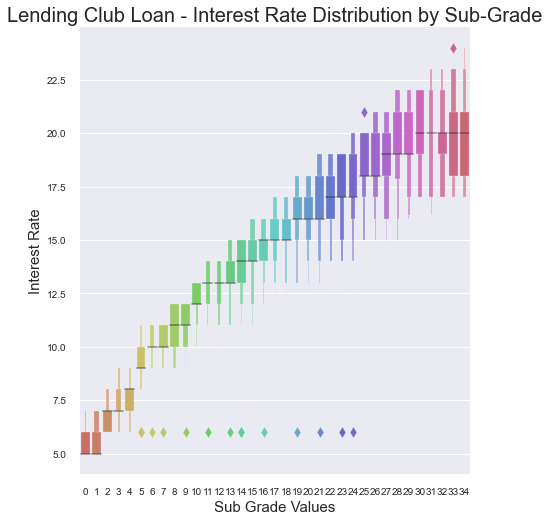

In [79]:
order_sub = df.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(7,8))

plt.subplot(111)
g2 = sns.boxenplot(x="sub_grade", y="int_rate", data=df, 
                   palette="hls", order=order_sub)
g2.set_xlabel("Sub Grade Values", fontsize=15)
g2.set_ylabel("Interest Rate", fontsize=15)
g2.set_title("Lending Club Loan - Interest Rate Distribution by Sub-Grade", fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


In [46]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.sub_grade)
le.classes_

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [47]:
df.sub_grade = le.transform(df.sub_grade)

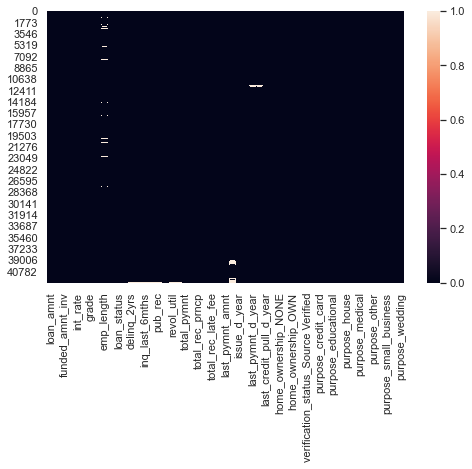

In [48]:
# Checking for null values in the updated dataframe
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(df.isnull())
plt.show()

## Checking correlation: 
Now that we have converted all the columns to numerical columns, we will check for correlation.

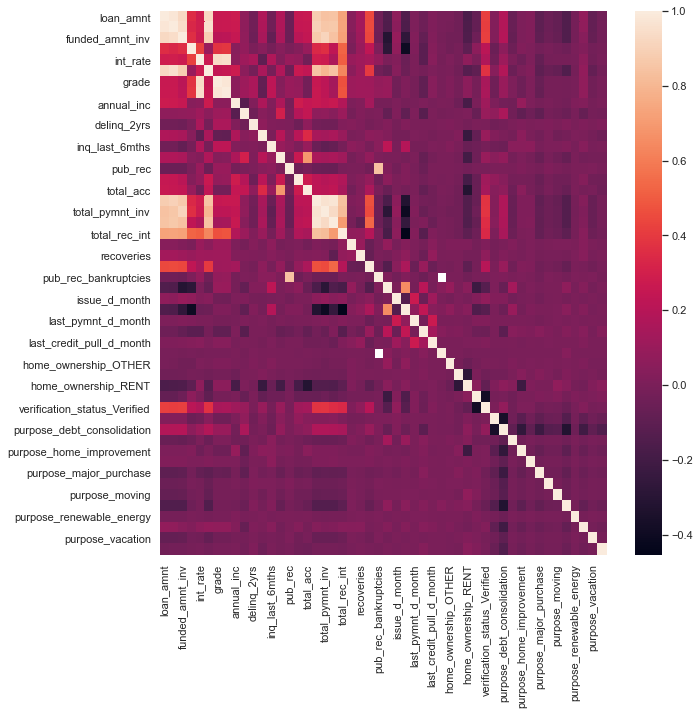

In [49]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr())
plt.show()

TAKE OUT 

There are few columns with high correlation but these columns haven’t been considered while solving our questions. For example, when trying to classify if the loan will be paid back by the customer we will not consider any future transactions like total_pymnt and total_pymnt_inv. Hence, these columns aren’t dropped here.

## Dealing with null values:
We check for the left-over null values and deal with these respectively.

In [50]:
# Checking for null values
# Percentage of null values
print('Percentage of null values:')
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'],ascending=False)

Percentage of null values:


,Percentage of null values
pub_rec_bankruptcies,3.209122
emp_length,2.614318
revol_util,0.211590
last_pymnt_d_year,0.195133
last_pymnt_d_month,0.195133
delinq_2yrs,0.068179
earliest_cr_line,0.068179
inq_last_6mths,0.068179
open_acc,0.068179
pub_rec,0.068179


There are only two columns whose percentage of null values is greater than 2.0%.

In [51]:
# Dropping the 29 rows which have null values in 4 columns
print(df[df['delinq_2yrs'].isnull()])
df = df[df['delinq_2yrs'].notnull()]

       loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
42452     5000.0       5000.0           3025.0   3.0       7.0       155.38   
42453     7000.0       7000.0           3450.0   3.0       7.0       218.55   
42462     4350.0       4350.0            825.0   3.0       8.0       136.45   
42475     3900.0       3900.0           2025.0   3.0       9.0       124.62   
42483     6700.0       6700.0           6700.0   3.0       7.0       209.18   
42486     3200.0       3200.0           2000.0   3.0       9.0       103.20   
42497     7200.0       5075.0            350.0   3.0      10.0       164.42   
42512     1900.0       1900.0            900.0   3.0       9.0        61.00   
42517     1200.0       1200.0            500.0   3.0       9.0        38.17   
42518     5000.0       5000.0            375.0   3.0      11.0       164.23   
42519     1400.0       1400.0            475.0   3.0      10.0        45.78   
42520     1000.0       1000.0            625.0   3.0

In [52]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,10+ years,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.70%,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,< 1 year,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.40%,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
df.isnull().sum() 

# BAR GRAPH 

loan_amnt                                 0
funded_amnt                               0
funded_amnt_inv                           0
term                                      0
int_rate                                  0
installment                               0
grade                                     0
sub_grade                                 0
emp_length                             1112
annual_inc                                0
loan_status                               0
dti                                       0
delinq_2yrs                               0
earliest_cr_line                          0
inq_last_6mths                            0
open_acc                                  0
pub_rec                                   0
revol_bal                                 0
revol_util                               61
total_acc                                 0
total_pymnt                               0
total_pymnt_inv                           0
total_rec_prncp                 

Some columns have a very little percentage of null values(less than 1%). There we can replace the null values with the median of their respective columns.

In [54]:
# As the null values in these columns are less than 0.5% of the size, we are simply imputing null values with median.
# mean vs mediian: mean more senstive is more sensitive to outliers AND MODE IS USED MORE FOR Categorical columns 
df['last_pymnt_d_year'].fillna(df['last_pymnt_d_year'].median(),inplace=True)
df['last_pymnt_d_month'].fillna(df['last_pymnt_d_month'].median(),inplace=True)
df['last_credit_pull_d_year'].fillna(df['last_credit_pull_d_year'].median(),inplace=True)
df['last_credit_pull_d_month'].fillna(df['last_credit_pull_d_month'].median(),inplace=True)

In [55]:
# Filling null values with median(string) which is close to 50.
# percentage of money used iin day to daya expenses 
df.revol_util.fillna('50%',inplace=True)  

# Converting string to float
df.revol_util = df.revol_util.apply(lambda x:x[:-1])
df.revol_util = df.revol_util.astype('float')

In [56]:
df.pub_rec_bankruptcies.value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [57]:
# pub_rec_bankruptcies column is highly imbalanced.
#So, it is better to fill it with median(0) as even after building model the model will be skewed very much towards 0.
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(),inplace=True)

In [58]:
# seperating null values by assigning a random string
df['emp_length'].fillna('5000',inplace=True) 
# Filling less than one year as 0 years of experience
df.emp_length.replace({'10+ years':'10 years','< 1 year':'0 years'},inplace=True) 
# Converting it's dtype to float
df.emp_length = df.emp_length.apply(lambda x:x[:2])
df.emp_length = df.emp_length.astype('float')

In [59]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,10.0,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,0.0,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,10.0,12252.0,Fully Paid,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,8,12,5.0,6.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,10.0,49200.0,Fully Paid,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,8,12,4.0,1.0,3.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,1.0,80000.0,Fully Paid,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,8,12,2.0,1.0,1.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [60]:
# Building models to fill null values in emp_length columns
df2 = df.drop('loan_status',axis=1)
df2_train = df2[df2['emp_length'] !=50]
df2_test = df2[df2['emp_length'] ==50]

For columns that have a high percentage of null values, we will run a model on top of non-null values and predict the missing values in that respective column.

In [61]:
# Assigning train and test to variables
x_train = df2_train.drop('emp_length',axis=1)
y_train = df2_train.emp_length
x_test = df2_test.drop('emp_length',axis=1)

In [62]:
df2_train.drop('emp_length',axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,24000.0,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,30000.0,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,12252.0,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,8,12,5.0,6.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,49200.0,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,8,12,4.0,1.0,3.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,80000.0,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,8,12,2.0,1.0,1.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42511,5350.0,5350.0,625.0,3.0,13.0,180.57,3,19,4000.0,15.00,0.0,13.0,1.0,1.0,0.0,0.0,50.0,1.0,6486.773238,757.80,5350.00,1121.77,15.00,0.0,1056.94,0.0,12,7,9.0,2.0,6.0,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42513,10000.0,10000.0,350.0,3.0,14.0,345.18,4,24,50000.0,7.22,2.0,20.0,0.0,14.0,0.0,10025.0,85.0,20.0,12622.317950,441.78,10000.00,2570.54,51.78,0.0,1605.65,0.0,12,7,9.0,8.0,9.0,8.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
42514,2000.0,2000.0,1275.0,3.0,7.0,61.87,0,0,150000.0,5.60,0.0,35.0,0.0,7.0,0.0,150786.0,2.2,16.0,2227.023184,1419.73,2000.00,227.02,0.00,0.0,63.59,0.0,12,7,9.0,7.0,9.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
42515,6000.0,6000.0,650.0,3.0,10.0,195.28,2,11,20000.0,12.90,0.0,23.0,4.0,5.0,0.0,13660.0,66.0,6.0,7029.871272,761.57,6000.00,1029.87,0.00,0.0,197.36,0.0,12,6,9.0,6.0,5.0,10.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [63]:
# We are running a decision tree classifier to predict the missing values in 'emp_length' column
from sklearn.tree import DecisionTreeClassifier
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(df2_train.drop('emp_length',axis=1), y_train)
giniPred = giniDecisionTree.predict(x_test)


In [64]:
# Predicted 'emp_length'
giniPred

array([10.,  2.,  2., ..., 10., 10.,  2.])

In [65]:
# Replacing the randomly fed value with predicted values
df.emp_length.replace({50:giniPred},inplace=True)

In [66]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,10.0,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,0.0,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,10.0,12252.0,Fully Paid,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,8,12,5.0,6.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,10.0,49200.0,Fully Paid,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,8,12,4.0,1.0,3.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,1.0,80000.0,Fully Paid,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,8,12,2.0,1.0,1.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [67]:
# Last check to find if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42506 entries, 0 to 42516
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            42506 non-null  float64
 1   funded_amnt                          42506 non-null  float64
 2   funded_amnt_inv                      42506 non-null  float64
 3   term                                 42506 non-null  float64
 4   int_rate                             42506 non-null  float64
 5   installment                          42506 non-null  float64
 6   grade                                42506 non-null  int32  
 7   sub_grade                            42506 non-null  int32  
 8   emp_length                           42506 non-null  float64
 9   annual_inc                           42506 non-null  float64
 10  loan_status                          42506 non-null  object 
 11  dti                         

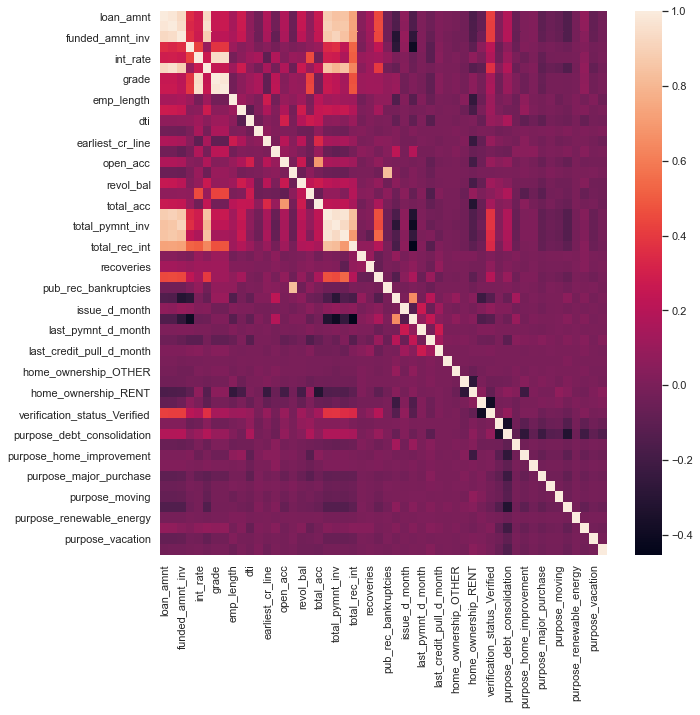

In [68]:
# Heatmap of correlation of the final dataframe
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('whitegrid')

sns.heatmap(df.corr())
plt.show()

In [69]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,10.0,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,0.0,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,10.0,12252.0,Fully Paid,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,8,12,5.0,6.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,10.0,49200.0,Fully Paid,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,8,12,4.0,1.0,3.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,1.0,80000.0,Fully Paid,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,8,12,2.0,1.0,1.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [70]:
df.shape

(42506, 53)

## Exploratory Data Analysis

What are some key findings around the loan amount?

Text(0, 0.5, 'Price ($)')

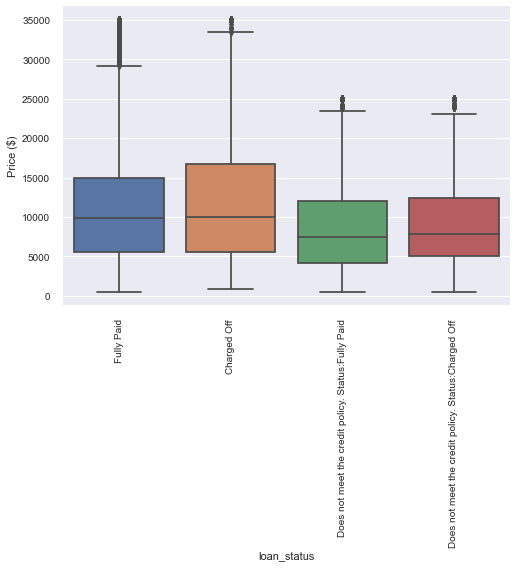

In [71]:
### show distributions 

# loan amount vs income plot

# pandas profliing 
from pandas_profiling import ProfileReport
# outlier treatments 
profile = ProfileReport(df)
sns.boxplot(y='loan_amnt', x='loan_status',data=df)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

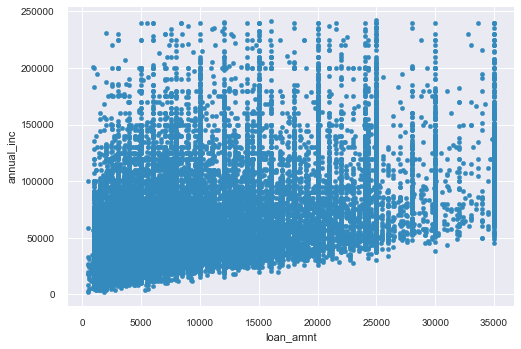

In [77]:
df.plot.scatter('loan_amnt', 'annual_inc')

In [ ]:
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_matrix(df)
# fig.show()

# Do Outliers Exist?
In most cases yes - and they may be univariate or multivariate in nature. 

A simple univariate example is to perhaps find an individual with an income of 70 million dollars per annum requesting a loan from the lenders club. 

Another more complex example (multivariate) could exist where someone's employee title does not match their income, like a financial manager stating that he earns 700 dollars per annum.

[Some more info,listed here](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html#:~:text=In%20this%20article%2C%20we%20have,need%20to%20try%20them%20all.)

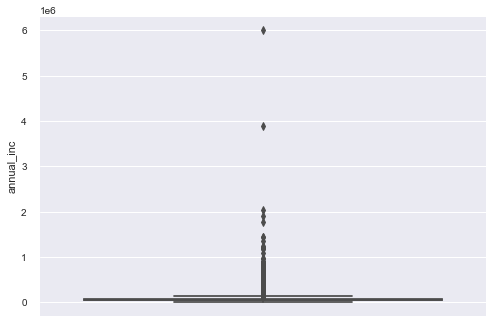

In [72]:
# for annual_inc, the highest value is 6000000 where 75% quantile value is 83000, and is 100 times the mean
# we need to remomve outliers from annual_inc i.e. 99 to 100%
sns.boxplot(y='annual_inc',data=df)
annual_inc_q = df["annual_inc"].quantile(0.99)
df = df[df["annual_inc"] < annual_inc_q]

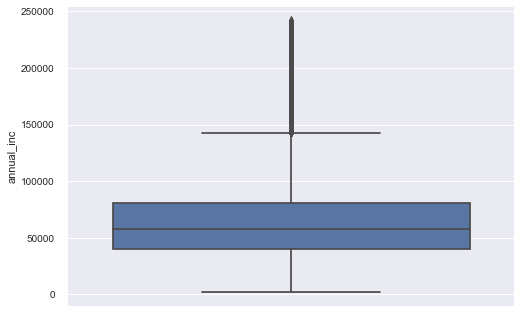

In [73]:
sns.boxplot(y='annual_inc',data=df)

In [74]:
# Storing the final dataframe into a csv file 
df.to_csv('pre_processed.csv',index=False)

In [76]:
profile.to_file("./Loan_data.html")

We can now move on to building a machine learning model in our next forum.